# Assignment 1

# 1. Regression

The goal of this part of assignment is to apply regression analysis using splines and advanced decision tree regression techniques on a real-world dataset. You will explore the dataset, preprocess it, apply different regression models, and compare their performance.

## Dataset
For this assignment, we will use the "California Housing Prices" dataset from the `sklearn.datasets` module for ease of access. 

### 1. Data Exploration and Preprocessing
- Load the California Housing Prices dataset.
- [Perform exploratory data analysis (EDA) to understand the dataset](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15).
- Visualize the distribution of the target variable and other features (plotting a histogram or a density plot of the target variable to see its distribution. This can reveal if the target is normally distributed, skewed, or has any unusual patterns.)
- Handle missing values if any (for now you can remove the observation).
- Normalize/standardize the features if required.

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)
df = california_housing.frame
df.shape
df.head

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

# Initial thoughts

From the above we can see that the dataset has a sum of *20640* rows with 9 numerical predictors (one of these we are going to use for prediction -> house price). Using house prices as our dependent variable, and the other 8 variables: [Median Income, House Age, Average Rooms, Average Bedrooms, Population, Average Household Members, Latitude, Longitude] as predictors. Acording to the description of the data, there does not exist any missing values -> to be safe, we conduct missing values analysis to confirm this, together with visual inspections. Since we are working with with a numerical predictions, we work towards regression analysis. 

In [2]:
# Performing exploratory analysis.
# First we want to check if there are any missing values in the dataset.

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

As we can see from the above output, there are no missing values in the dataset as the description stated. Now we want to perform visual inspections, to find potential patterns/hypotheses, spot anomalies and outliers. First I create simple plots to get a better understanding of the data.

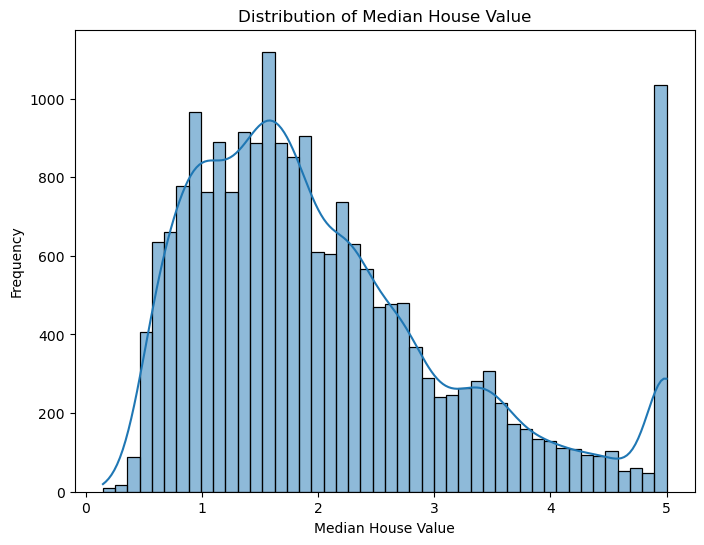

In [3]:
# Split the data into predictors and target

features = df.drop('MedHouseVal', axis=1)
target = df['MedHouseVal']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Exploring the data
# Plotting the distribution of the target variable

plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Lets investigate if any of the variables have any outliers, or the distributions in the data has any significant pattern

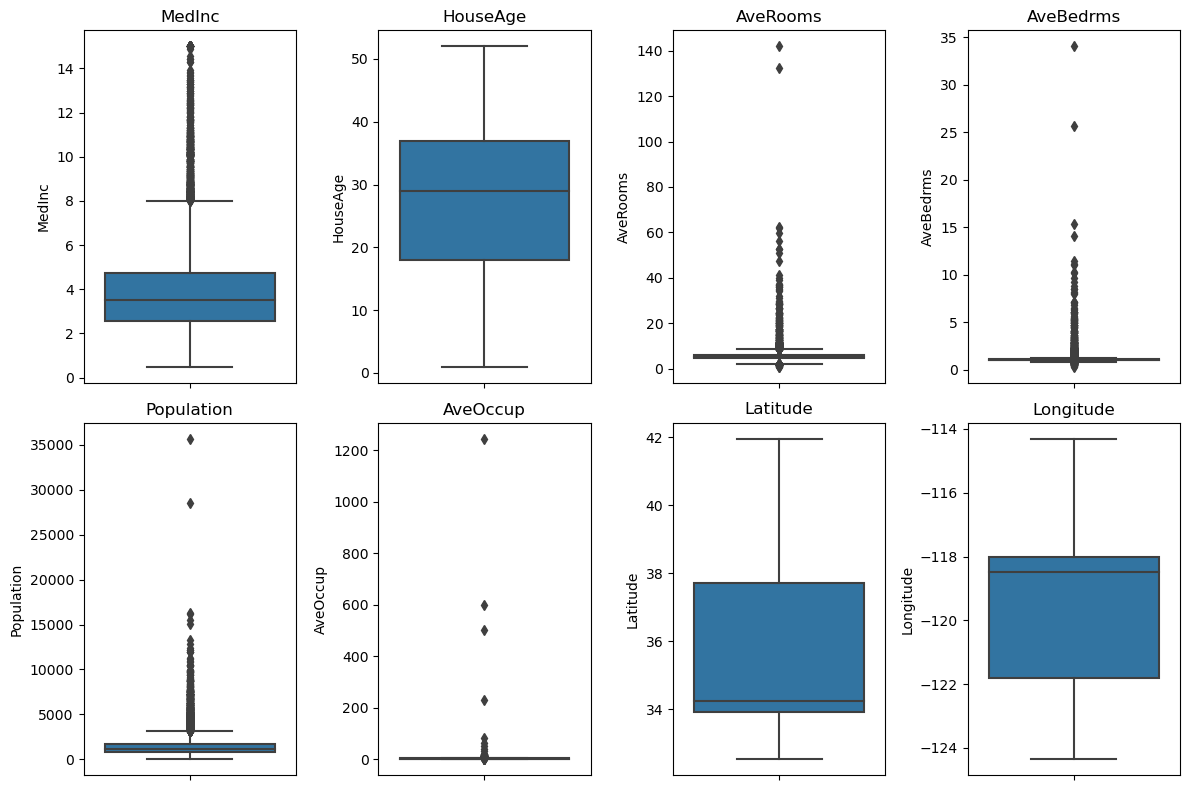

In [4]:
# Boxplot of variables

plt.figure(figsize=(12, 8))
for i, col in enumerate(features.columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The distribution of the target variable seems to have fairly skewed, as well as a high frequency at it's tail. 

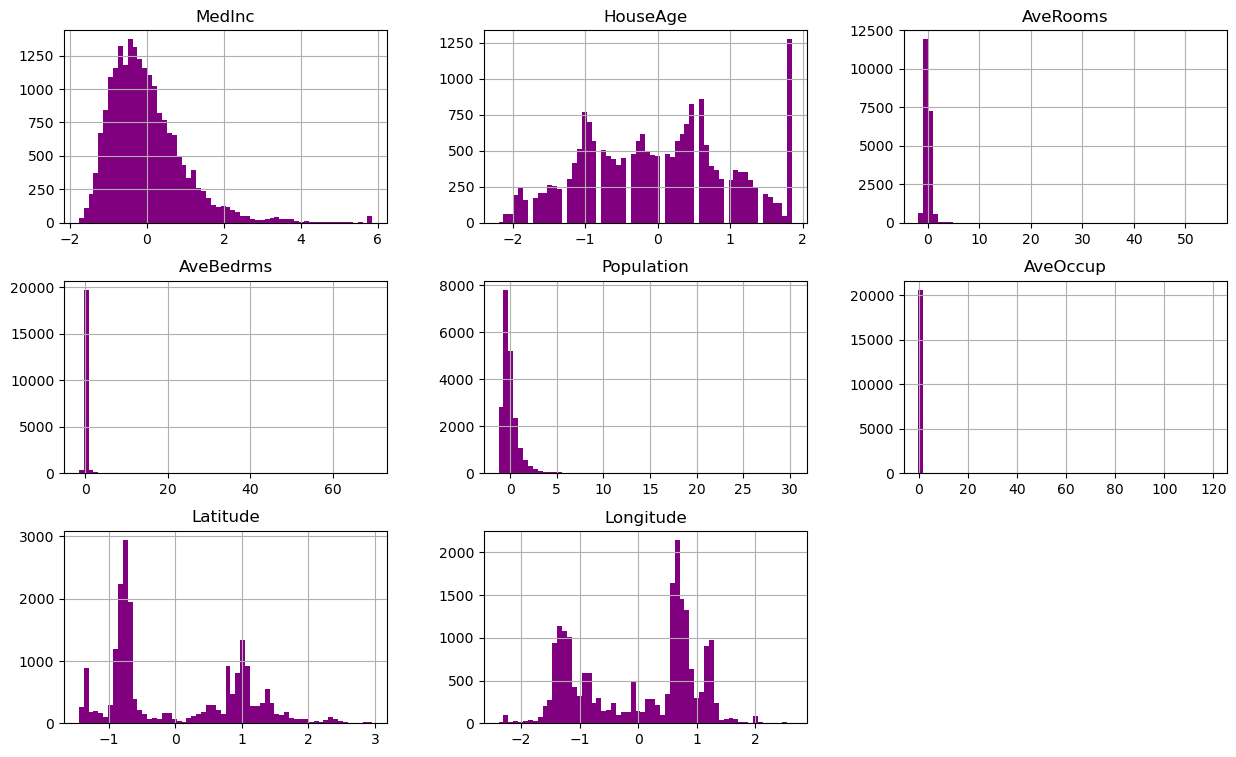

In [5]:
color1 = 'purple' # or any other color name or hex code

scaled_features_df.hist(bins=60, figsize=(15,9), color=color1)
plt.show()

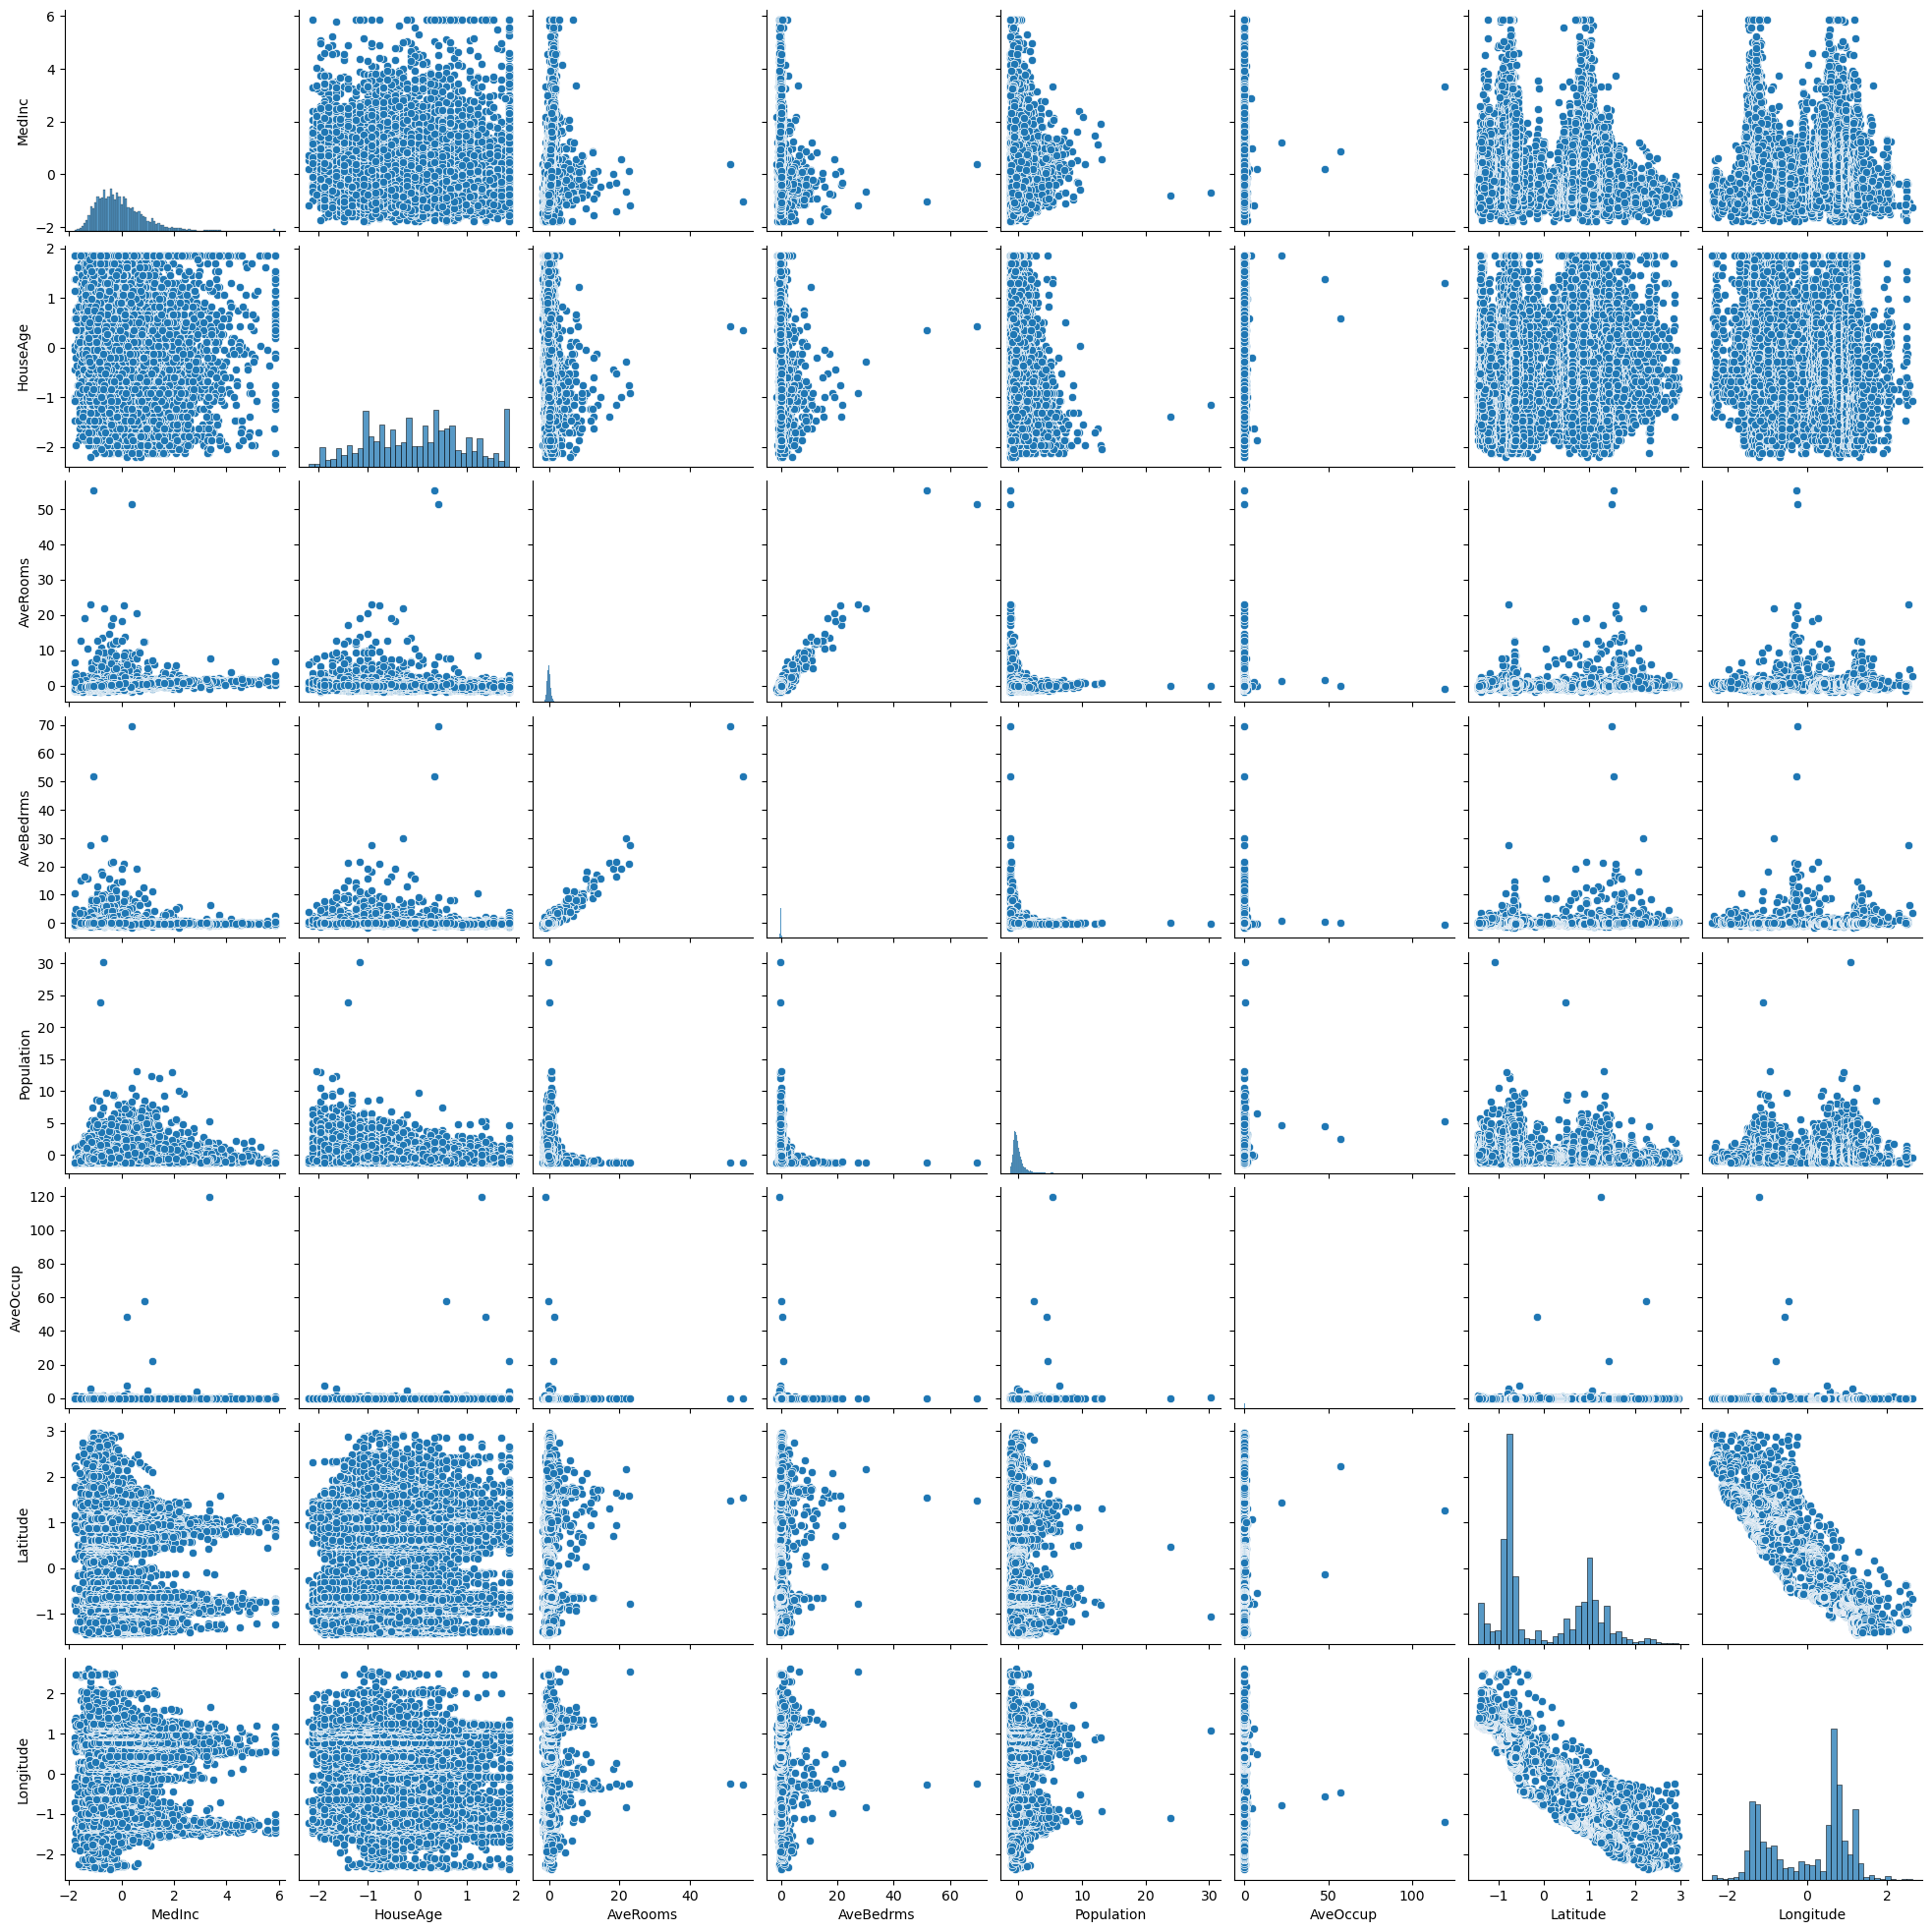

In [6]:
sns.pairplot(data = scaled_features_df, kind = 'scatter')

<Axes: >

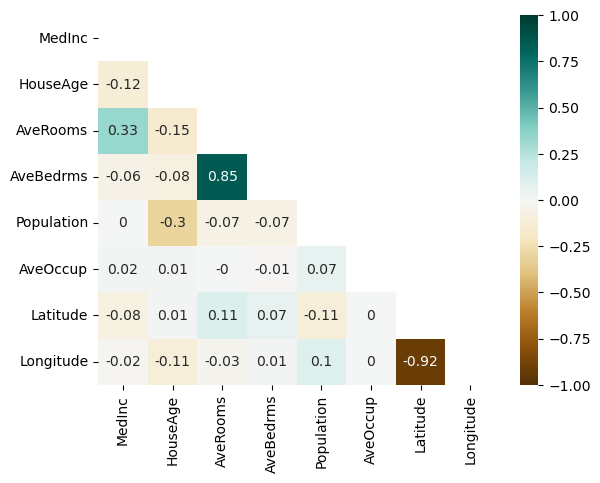

In [7]:
import numpy as np
import seaborn as sns
mask = np.triu(np.ones_like(scaled_features_df.corr(), dtype=np.bool_))

sns.heatmap(round(scaled_features_df.corr(),2), annot=True, cmap='BrBG', vmin=-1, vmax=1, mask=mask)

From the above correlation matrix displayed above, it is clear that some variables have high postive or negative correlation. The correlation between longitude and latitude is rather insignificant. We see high correlation between average bedrooms and average roomsl, as well as a weak positive correlation for average rooms and median income. It can be good practice to remove some of the highly correlated variables during feature selection. 

### 2. Regression with Splines
- Fit a spline model to the data. You may use the `patsy` library in Python for creating spline features.
- Experiment with different degrees of freedom to see how the model complexity affects the performance.
- Evaluate the model using appropriate metrics (e.g., RMSE, R²).

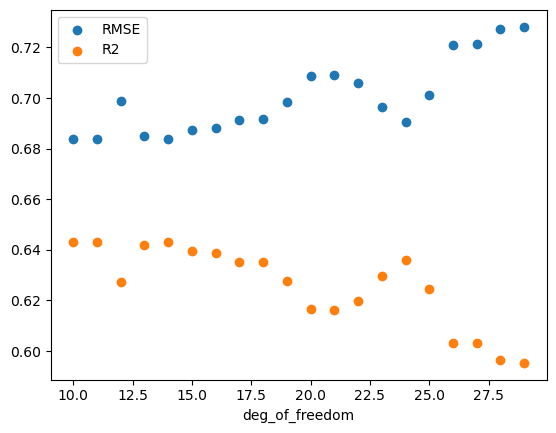

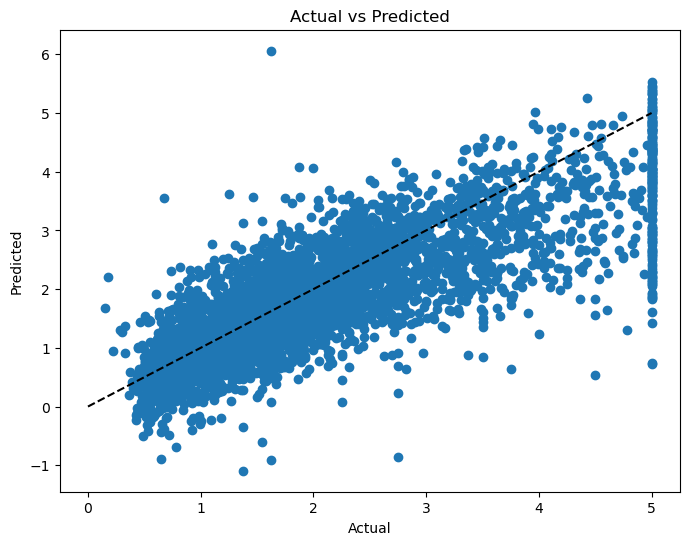

RMSE: 0.7281590614471121
R2: 0.5953815735608714


In [8]:
from patsy import dmatrix

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size = 0.2, random_state = 42)

feature_names = scaled_features_df.columns

deg_of_freedom = np.arange(10,30)
rmse = []
r2 = []

for df in deg_of_freedom:
    
    
    formula = ' + '.join([f"cr({feature}, df="+str(df)+")" for feature in feature_names])
    
    transformed_X_train = dmatrix(formula, data=X_train, return_type='dataframe')
    transformed_X_test = dmatrix(formula, data=X_test, return_type='dataframe')

     # Fit the model
    model = LinearRegression()
    model.fit(transformed_X_train, y_train)

    # Predict on the test set
    spline_pred = model.predict(transformed_X_test)

    # Evaluate the model
    rmse.append(np.sqrt(mean_squared_error(y_test, spline_pred)))
    r2.append(r2_score(y_test, spline_pred))
    

plt.scatter(deg_of_freedom, rmse)
plt.scatter(deg_of_freedom, r2)
plt.xlabel('deg_of_freedom')
plt.legend(['RMSE' , 'R2'])
plt.show()

# Plot actual vs predictions for SPline

plt.figure(figsize=(8, 6))
plt.scatter(y_test, spline_pred)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Print relevant performance metrics

print('RMSE:', np.sqrt(mean_squared_error(y_test, spline_pred)))
print('R2:', r2_score(y_test, spline_pred))

### 3. Regression with ensemble Decision Trees
- Apply Random Forest, AdaBoost and GradientBoosting regression techniques (from `sklearn`)
- For each method, tune hyperparameters using cross-validation.
- Evaluate the models using appropriate metrics (e.g., RMSE, R²).

Model:   Random Forest
{'n_estimators': [100, 200], 'max_depth': [10, 20]}


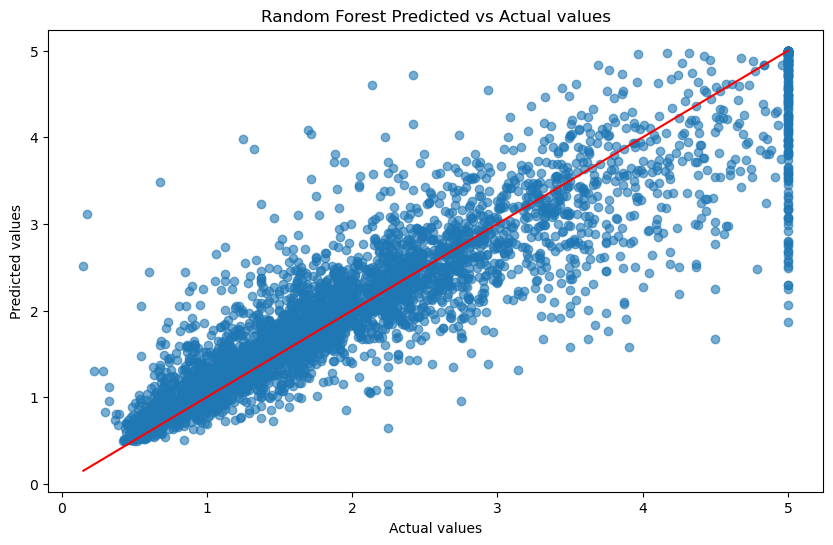

Model:   AdaBoost
{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}


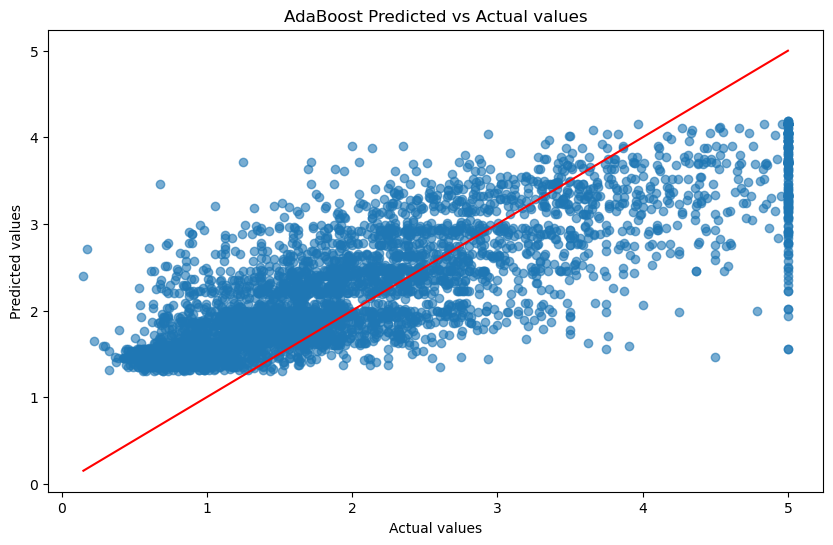

Model:   Gradient Boosting
{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}


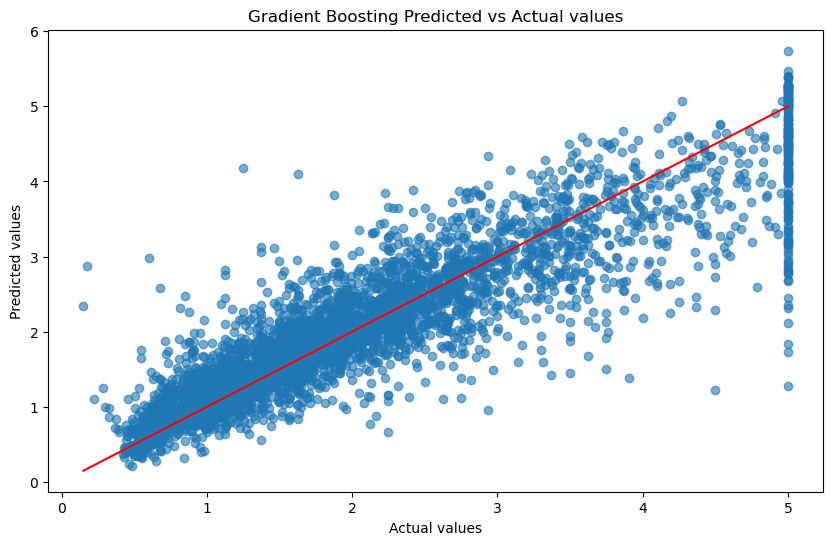

{'Random Forest': {'RMSE': 0.5048160712235051, 'R2': 0.8055269232757909, 'Best Params': {'n_estimators': 200, 'max_depth': 20}}, 'AdaBoost': {'RMSE': 0.7522341111205274, 'R2': 0.5681835462598108, 'Best Params': {'n_estimators': 100, 'learning_rate': 0.1}}, 'Gradient Boosting': {'RMSE': 0.5113702537480528, 'R2': 0.8004443339747364, 'Best Params': {'n_estimators': 200, 'learning_rate': 0.1}}}
CPU times: user 2min 48s, sys: 1.02 s, total: 2min 49s
Wall time: 2min 49s


In [9]:
%%time
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV



# Models to be used
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Hyperparameters for tuning
parameters = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]}, #number of trees in the forest and max depth
    "AdaBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Storing model performance
model_performance = {}

# Tuning hyperparameters and evaluating each model
for model_name in models:
    print('Model:  ', model_name)
    model = models[model_name]
    params = parameters[model_name]
    print(params)
    
    # Using GridSearchCV for hyperparameter tuning
    param_search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, scoring='neg_mean_squared_error')
    param_search.fit(X_train, y_train)

    # Best model
    best_model = param_search.best_estimator_
    
    # Predict on test set
    tree_pred = best_model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
    r2 = r2_score(y_test, tree_pred)

    # Store results
    model_performance[model_name] = {'RMSE': rmse, 
                                     'R2': r2,
                                     'Best Params': param_search.best_params_}

    # Visualization: Predicted vs Actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, tree_pred, alpha=0.6)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(f'{model_name} Predicted vs Actual values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.show()

# Output model performance
print(model_performance)

### 4. Model Comparison
- Compare the performance of the spline models with the advanced decision tree regression models.
- Use visualizations to compare the predicted vs actual values for each model.
- Discuss the bias-variance tradeoff for each model based on your results.

### Bias-Variance Tradeoff in Different Regression Models

The **bias-variance tradeoff** is a key concept in statistical learning and machine learning. It involves balancing two types of error in model predictions: 

- **Bias**: Error due to overly simplistic assumptions, leading to underfitting.
- **Variance**: Error due to excessive complexity, leading to overfitting.

An ideal model minimizes both bias and variance. Below is a discussion of this tradeoff in spline regression, random forest, AdaBoost, and gradient boosting for regression.

#### 1. Spline Regression
- **Bias**: Moderate. Assumes relationships can be modeled as piecewise polynomial functions, which can be restrictive but works well for smooth data.
- **Variance**: Controlled by the number and placement of knots. More knots increase variance, leading to potential overfitting, while fewer knots may lead to underfitting.

#### 2. Random Forest
- **Bias**: Generally low. Models complex relationships without strong assumptions on data distribution.
- **Variance**: Reduced by averaging multiple trees. However, too many trees or overly deep trees can lead to overfitting.

#### 3. AdaBoost (Adaptive Boosting)
- **Bias**: Initially high but reduced iteratively. Focuses on misclassified instances, thereby improving model accuracy over iterations.
- **Variance**: Can increase with the number of boosting rounds, leading to overfitting if not properly managed.

#### 4. Gradient Boosting
- **Bias**: Similar to AdaBoost, it sequentially adds models to correct previous errors, effectively reducing bias.
- **Variance**: Higher than random forests. Sensitive to overfitting with many boosting rounds or complex base learners. Regularization techniques can help manage this.


### 5. Analysis and Discussion
- Discuss the performance of each model and the impact of hyperparameters on the outcome.

- Provide insights on which features are most important for predicting housing prices.

# 2. Classification
In this assignment, you will apply various classification techniques on a dataset to predict categorical outcomes. You will use Support Vector Machines (SVM), advanced decision tree classifiers, and Generalized Additive Models (GAMs) to build predictive models and compare their performance.

## Dataset
We will use the "Breast Cancer Wisconsin (Diagnostic)" dataset for this assignment. This dataset is included in the `sklearn.datasets` module.

## Tasks

### 1. Data Exploration and Preprocessing
* Begin by loading the dataset and conducting exploratory data analysis (EDA).
* Visualize the distribution of the classes (malignant and benign) and the features.
* Preprocess the data by handling missing values, encoding categorical variables if necessary, and scaling the features.

In [10]:
# Load breast cancer wisconsin (diagnostic) dataset from sklearn.datasets

from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

As we can see above, we have 30 numeric variables, therefore there is no need for encoding categorical variables. 

In [11]:
# Exploratory data analysis

# split the data into predictors and target

features = df.data
target = df.target

# Check the shape of the data
print(df.data.shape)

# Check the target names
print(df.target_names)

# Check the feature names
print(df.feature_names)

# Convert the data into a pandas dataframe
import pandas as pd

df = pd.DataFrame(df.data, columns=df.feature_names)

(569, 30)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [60]:
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [3]:
# Check for missing values

print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [12]:
# Summary statistics
summary_stats = df.describe().to_string(float_format="{:.2f}".format)
print(summary_stats)

       mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
count       569.00        569.00          569.00     569.00           569.00            569.00          569.00               569.00         569.00                  569.00        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00          569.00                   569.00        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00

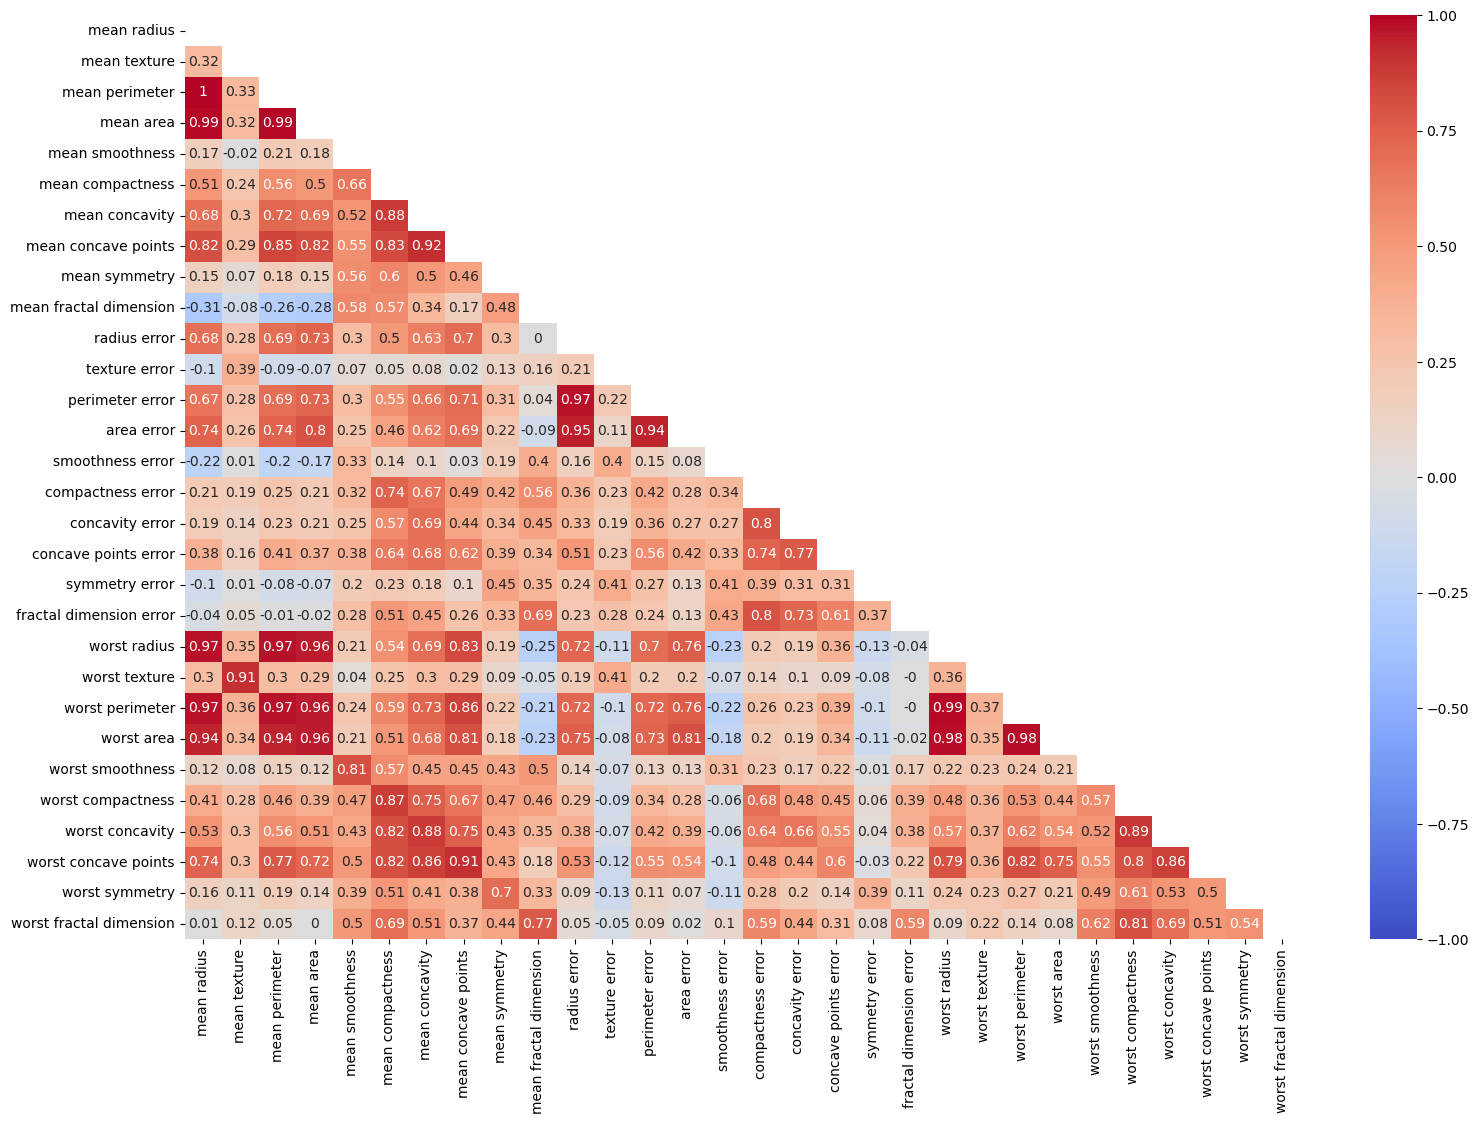

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate correlation plot

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

# Bivariate correlation plot using seaborn
plt.figure(figsize=(18, 12))  # Adjust the figure size as per your preference
sns.heatmap(round(df.corr(),2), annot=True,  cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.show()


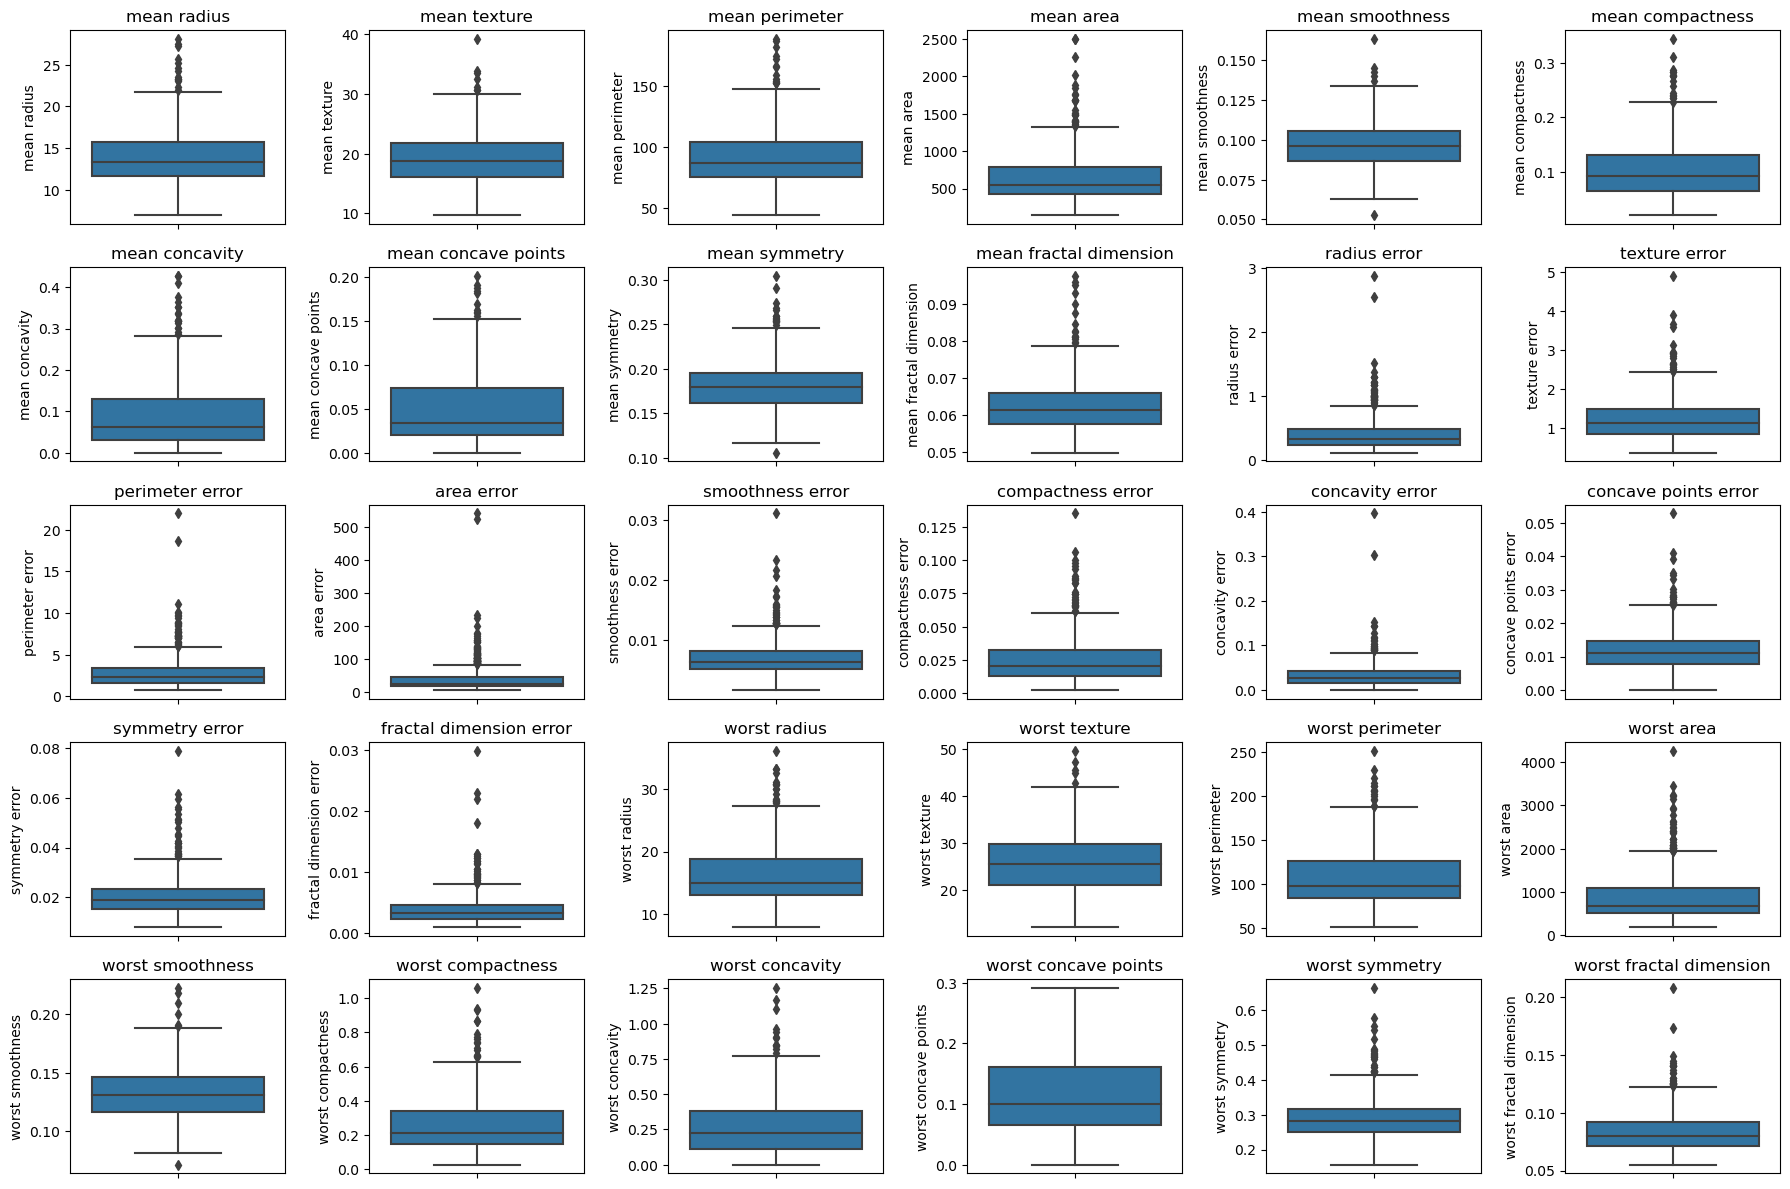

In [14]:
# Boxplots of the features

plt.figure(figsize=(18, 12))  # Adjust the figure size as per your preference
for i, col in enumerate(df.columns):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

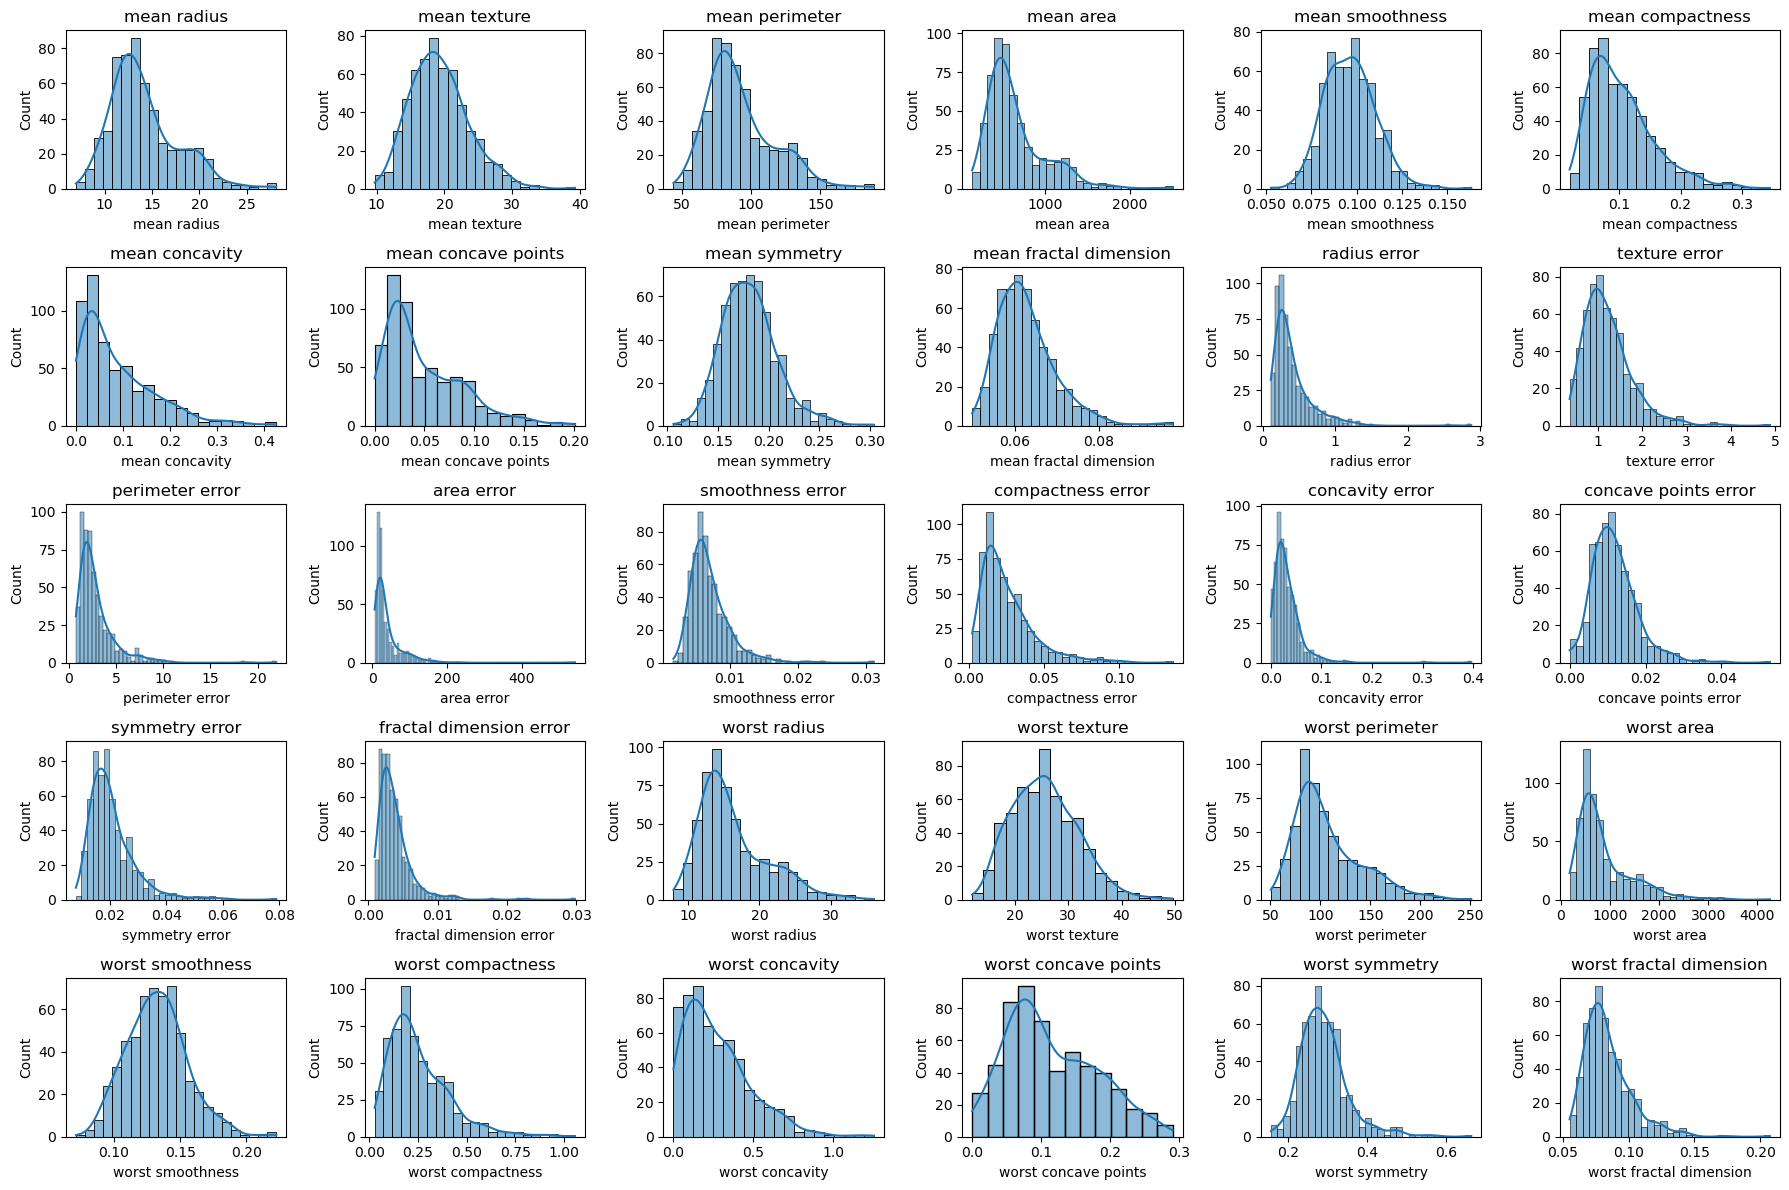

In [15]:
# Visualize the distribution of target and features

plt.figure(figsize=(18, 12))  # Adjust the figure size as per your preference
for i, col in enumerate(df.columns):
    plt.subplot(5, 6, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

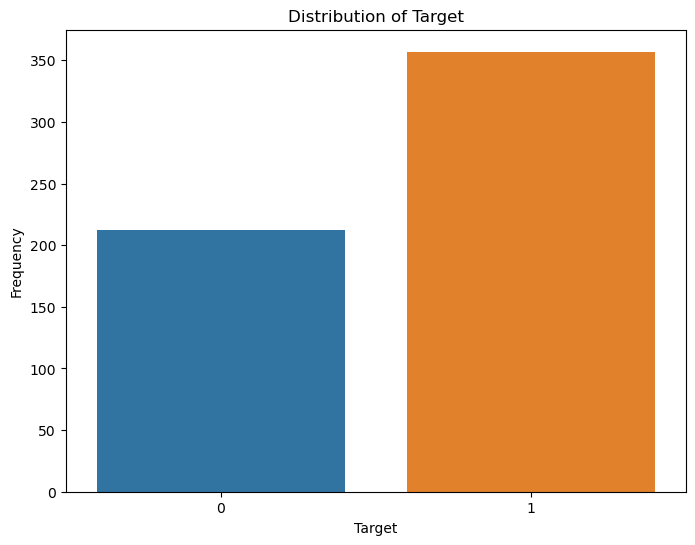

In [59]:
# Visualizing the two target classes

plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Preprocessing

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 2. Classification with Support Vector Machines (SVM)
* Train an SVM classifier using the preprocessed data.
* Experiment with different kernels (linear, polynomial, and radial basis function) and regularization parameters.
* Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score, and ROC-AUC).

The first metric, **Accuracy**, measures the number of correct predictions over all predictions:  

$\frac{True Positives + True Negatives}{True Positives + True Negatives + False Negatives + False Positives} = $  

$\frac{N. of Correct Predictions}{N. of all Predictions} = $  

$\frac{N. of Correct Predictions}{Size of Dataset}$  

Second is **Precision**, measuring how many of the positive predictions made are correct -> True Positives.  

$\frac{True Positives}{True Positives + False Positives} = $  

$\frac{N. of Correctly Predicted Positives Instances}{N. of Total Positive Predictions you Made} = $  

$\frac{N. of Correctly Predicted People with Cancer}{N. of people you Predicted to have Cancer}$  

Third is **Recall**, measuring how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.  

$\frac{True Positives}{True Positives + False Negatives} = $  

$\frac{N. of Correctly Predicted Positives Instances}{N. of Total Positive Instances in the Dataset} = $  

$\frac{N. of Correctly Predicted People with Cancer}{N. of People with cancer in the Dataset}$  

Fourth is **F1-Score** which measures a combination of precision and recall.  

$2 * \frac{Precision * Recall}{Precision + Recall}$


Linear kernel: 
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793103


Polynomial kernel: 
Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0
F1 Score: 0.9594594594594594


Radial basis function kernel: 
Accuracy: 0.6228070175438597
Precision: 0.6228070175438597
Recall: 1.0
F1 Score: 0.7675675675675676




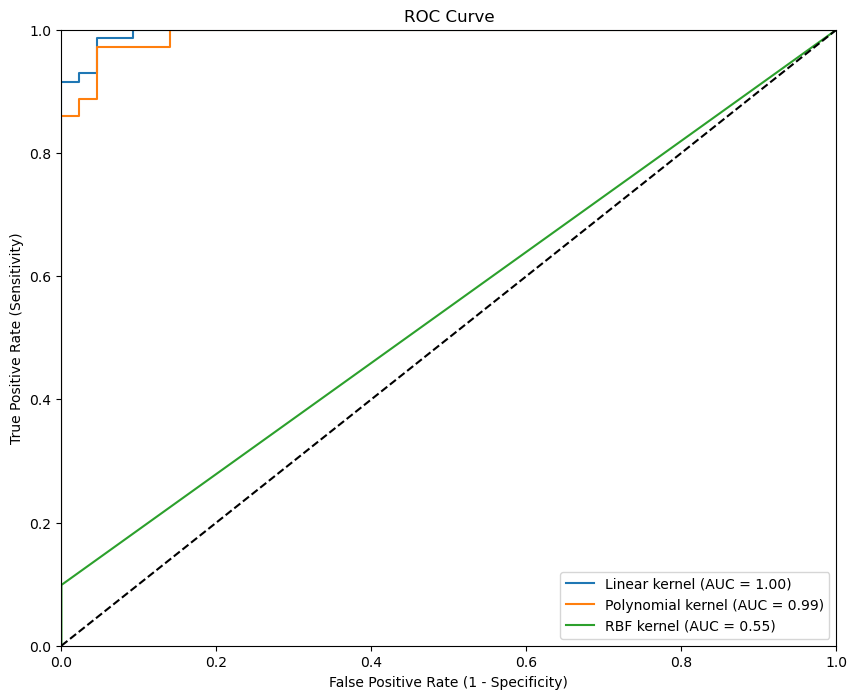

In [35]:
# Training a Support Vector Machine classifer using the preprocessed data, training on different kernels, linear, polynomial and radial basis function together with regularizaiton parameters. 

from sklearn.svm import SVC
from sklearn import metrics

# Linear kernel

svm_linear = SVC(kernel='linear', C=1)

# Polynomial kernel

svm_poly = SVC(kernel='poly', degree=3, C=1)

# Radial basis function kernel

svm_rbf = SVC(kernel='rbf', gamma=0.7, C=1)

# Fit the models

svm_linear = svm_linear.fit(X_train, y_train)
svm_poly = svm_poly.fit(X_train, y_train)
svm_rbf = svm_rbf.fit(X_train, y_train)

# Predict on test set

y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# To reduce redundancy, i setup a model evaluation function that prints the necessary scores for the given model. 

def evaluate_model_performance(y_test, y_pred, model_name):
    """
    Prints the performance metrics for the given model.

    Parameters:
    y_test (array): The true labels.
    y_pred (array): The predicted labels from the model.
    model_name (str): The name of the model.
    """
    print(f'{model_name} kernel: ')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('\n')

evaluate_model_performance(y_test, y_pred_linear, 'Linear')
evaluate_model_performance(y_test, y_pred_poly, 'Polynomial')
evaluate_model_performance(y_test, y_pred_rbf, 'Radial basis function')

# ROC-AUC curve

from sklearn.metrics import roc_curve, auc

# Linear kernel
y_pred_prob_linear = svm_linear.decision_function(X_test)
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Polynomial kernel
y_pred_prob_poly = svm_poly.decision_function(X_test)
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, y_pred_prob_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Radial basis function kernel
y_pred_prob_rbf = svm_rbf.decision_function(X_test)
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, y_pred_prob_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# Plot ROC curves

plt.figure(figsize=(10, 8))
plt.plot(fpr_linear, tpr_linear, label='Linear kernel (AUC = %0.2f)' % roc_auc_linear)
plt.plot(fpr_poly, tpr_poly, label='Polynomial kernel (AUC = %0.2f)' % roc_auc_poly)
plt.plot(fpr_rbf, tpr_rbf, label='RBF kernel (AUC = %0.2f)' % roc_auc_rbf)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 3. Classification with Advanced Decision Trees

* Apply advanced decision tree classification techniques such as Random Forest and Gradient Boosting.
* Tune hyperparameters with cross-validation.

* Evaluate the models using the same metrics as for SVM.

Random Forest kernel: 
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


Gradient Boosting kernel: 
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965




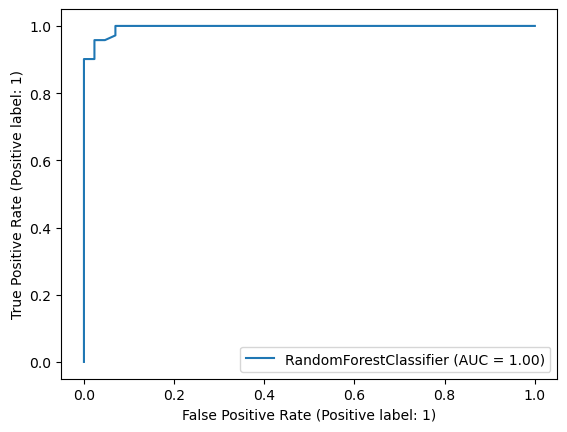

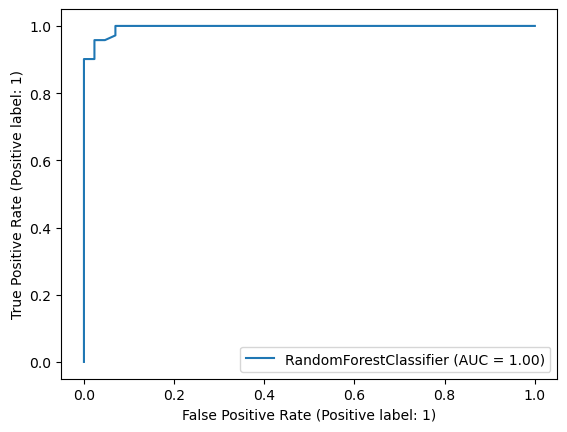

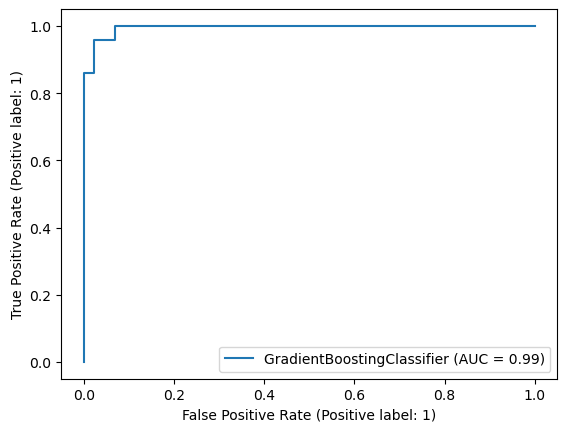

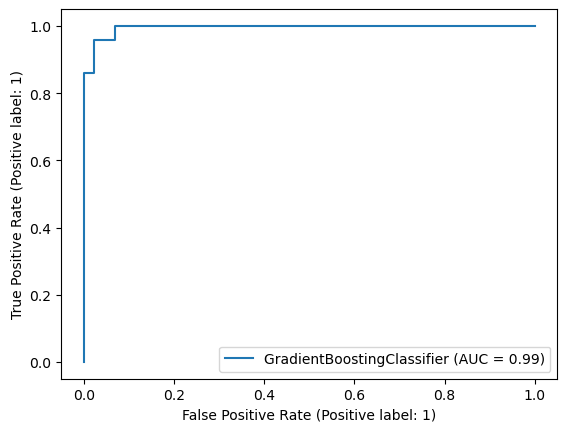

In [42]:
# Random Forest and Gradient Boosting for decision trees

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest

rf = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)

# Gradient Boosting

gb = GradientBoostingClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)

# Predict on test set

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Evaluate the models

evaluate_model_performance(y_test, y_pred_rf, 'Random Forest')
evaluate_model_performance(y_test, y_pred_gb, 'Gradient Boosting')

# ROC-AUC curve

from sklearn.metrics import RocCurveDisplay

# Use RocCurveDisplay from sklearn.metrics to plot the ROC curve

# Random Forest
roc_display_rf = RocCurveDisplay.from_estimator(rf, X_test, y_test)
roc_display_rf.plot()

# Gradient Boosting
roc_display_gb = RocCurveDisplay.from_estimator(gb, X_test, y_test)
roc_display_gb.plot()

### 4. Classification with Generalized Additive Models (GAMs)

* Fit a GAM for classification using the `pyGAM` library.

* Select appropriate link functions and distribution families for the binary classification task.
* Visualize the contribution of each feature to the model using partial dependency plots.
* Evaluate the model using the same metrics as for SVM and decision trees.

did not converge


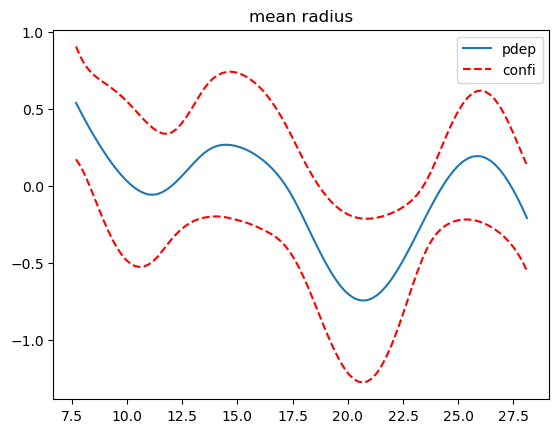

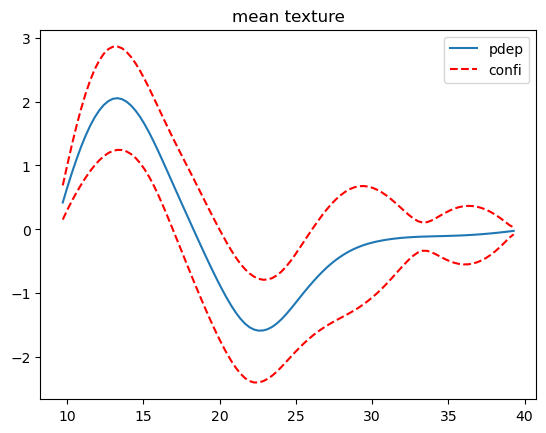

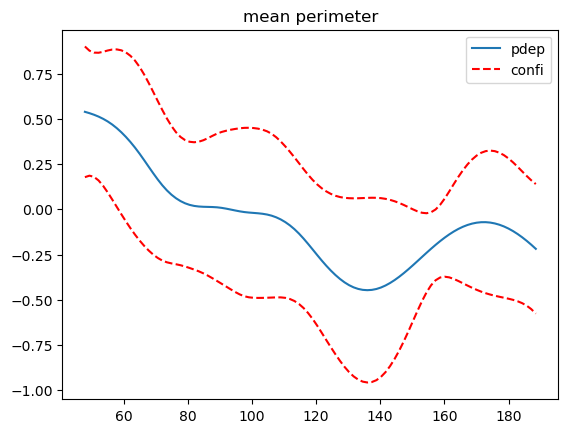

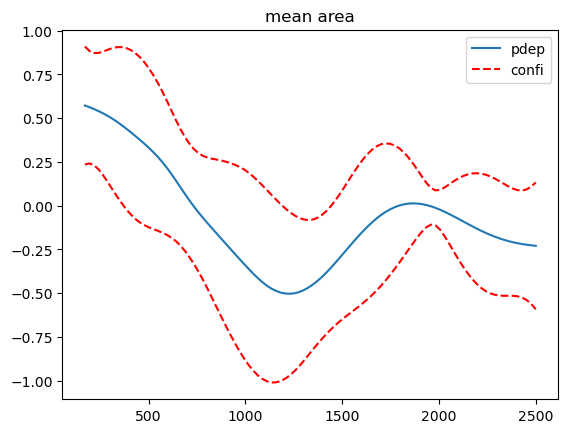

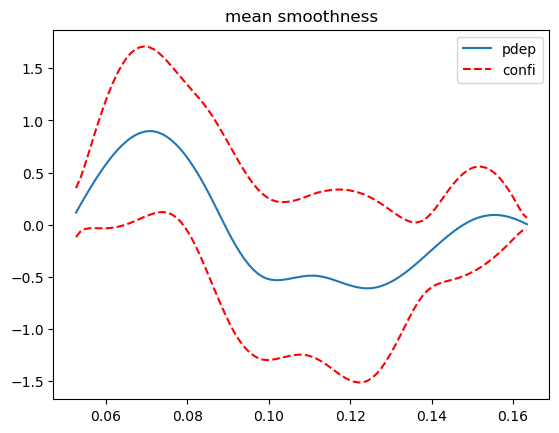

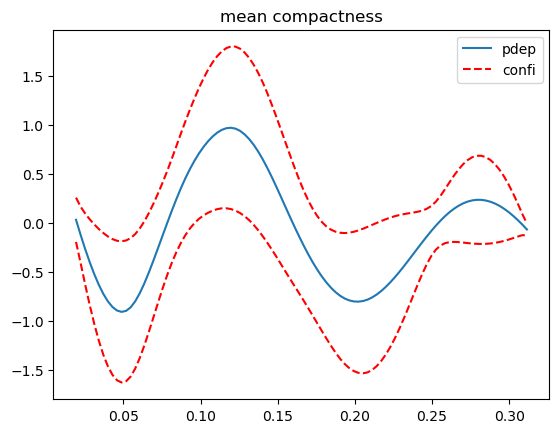

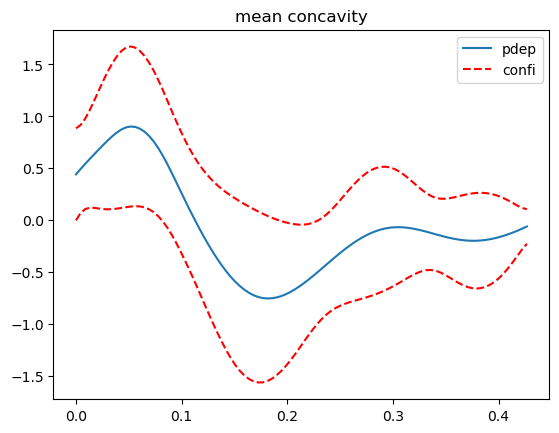

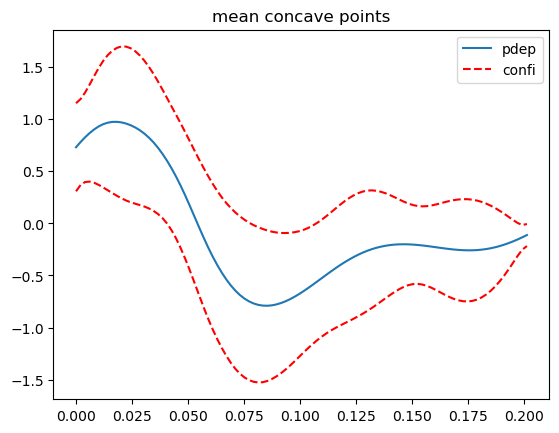

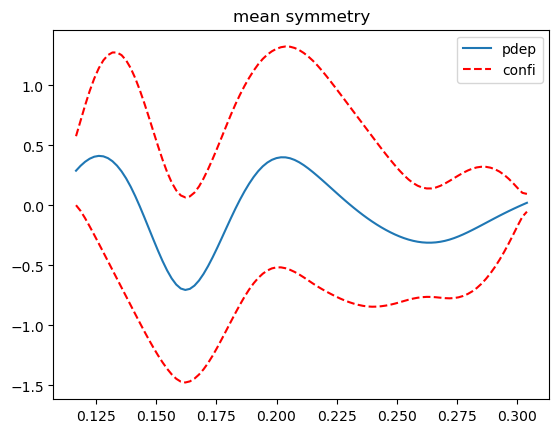

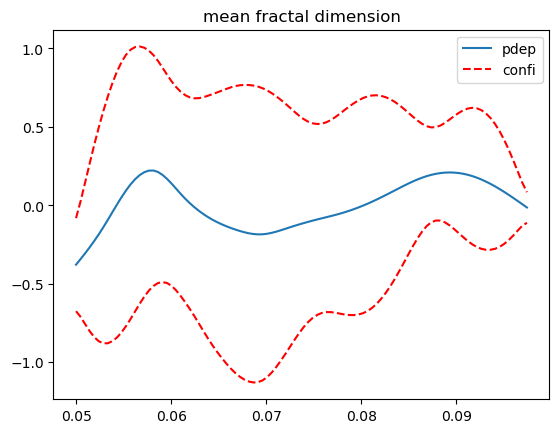

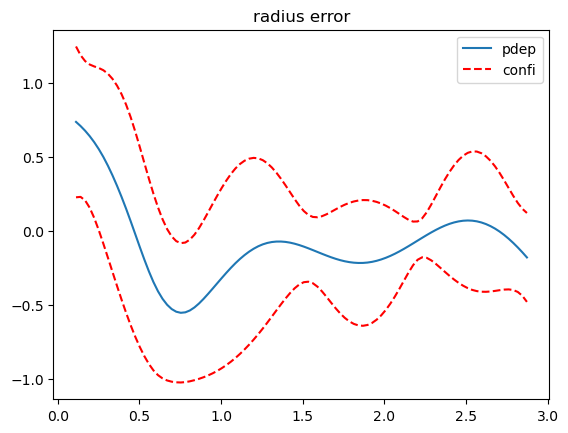

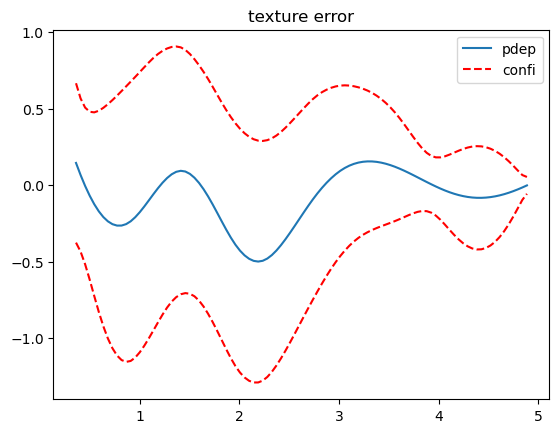

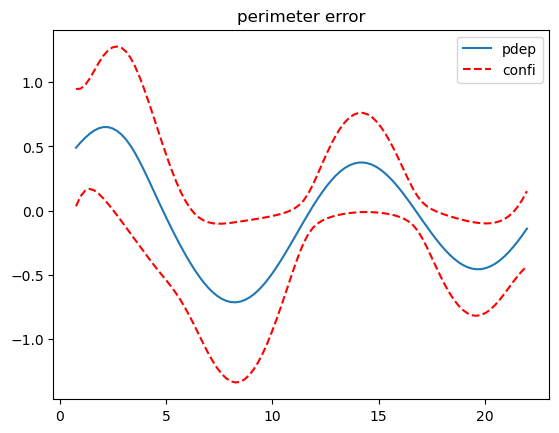

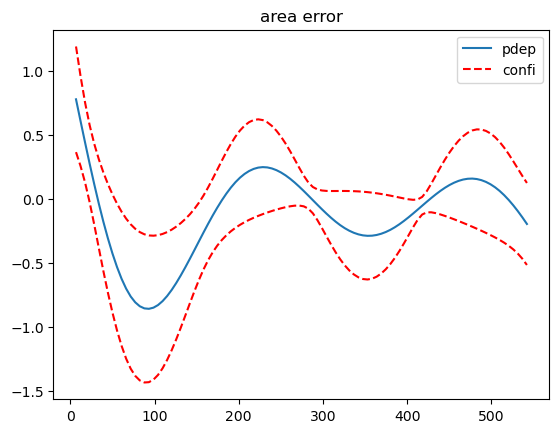

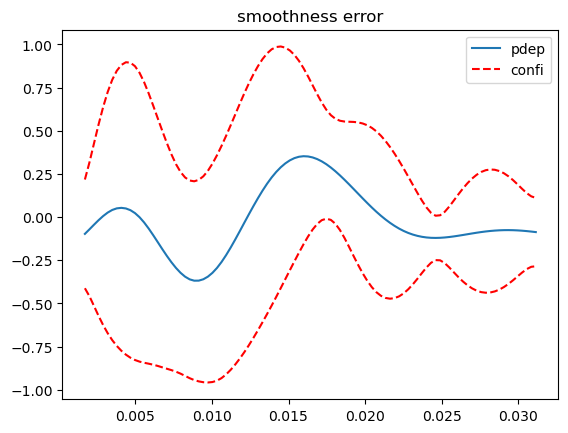

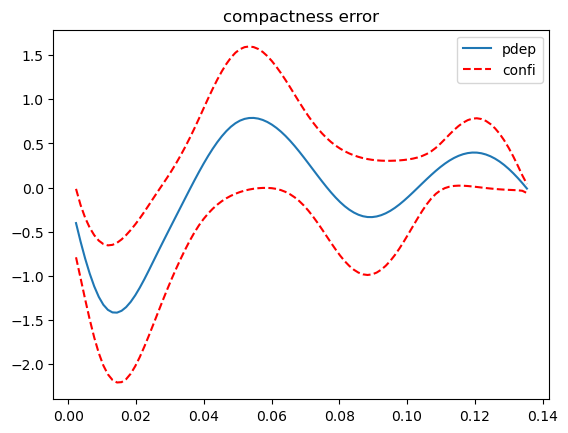

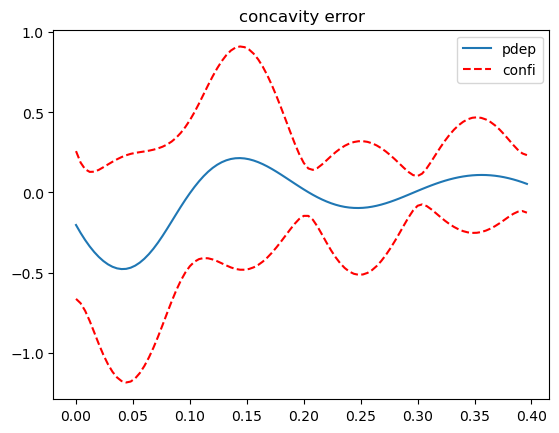

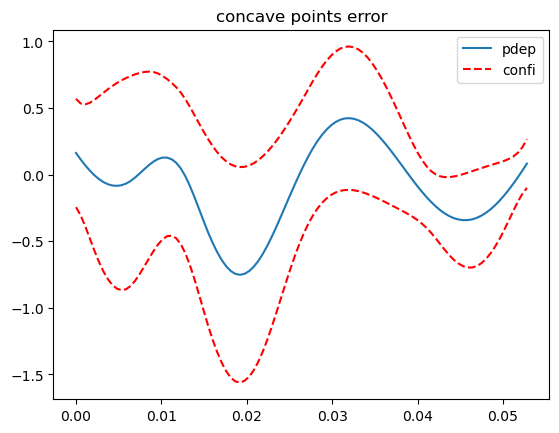

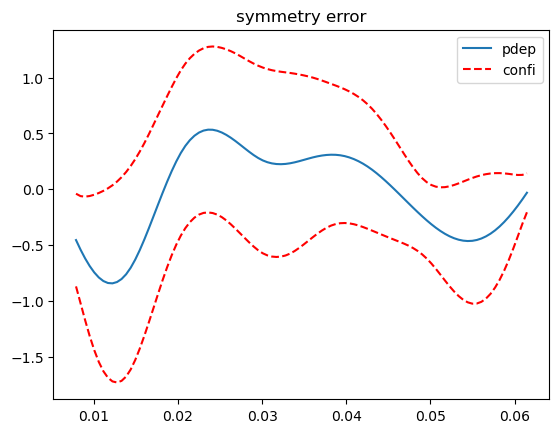

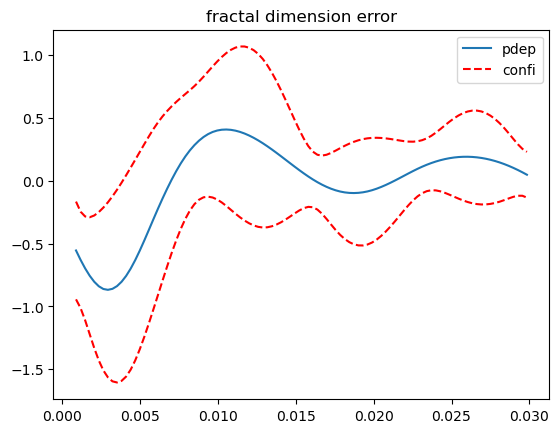

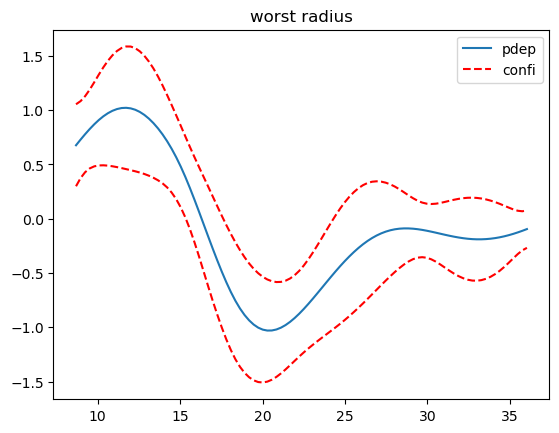

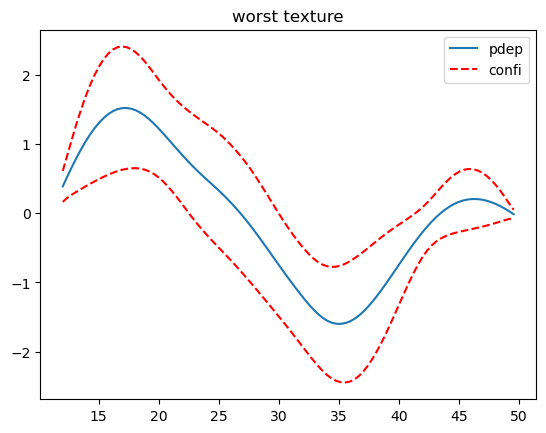

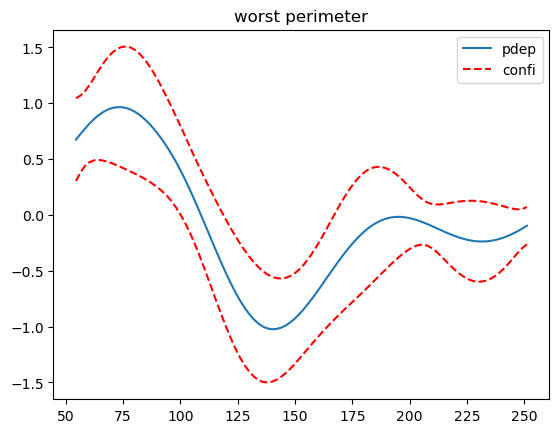

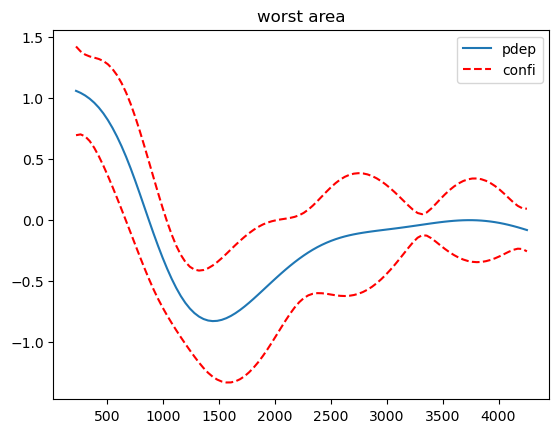

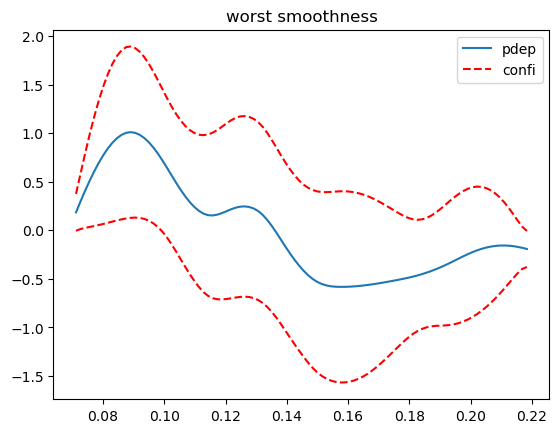

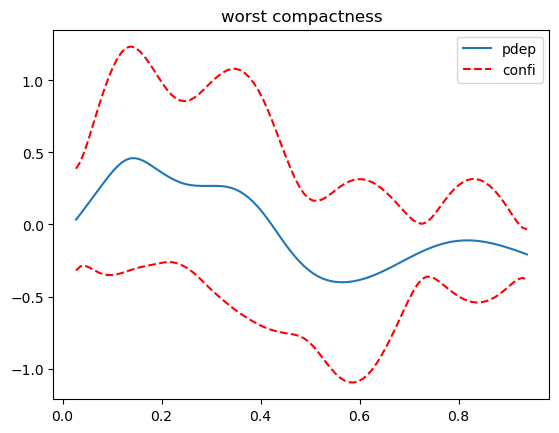

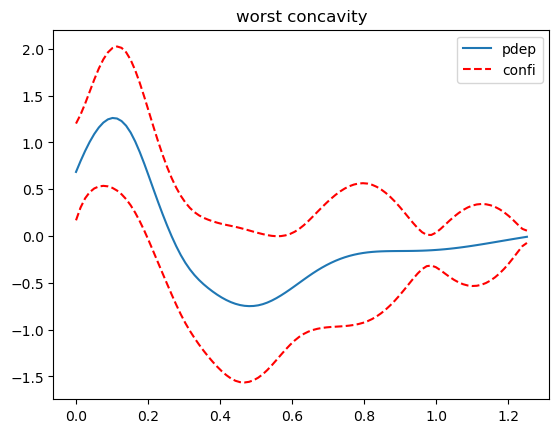

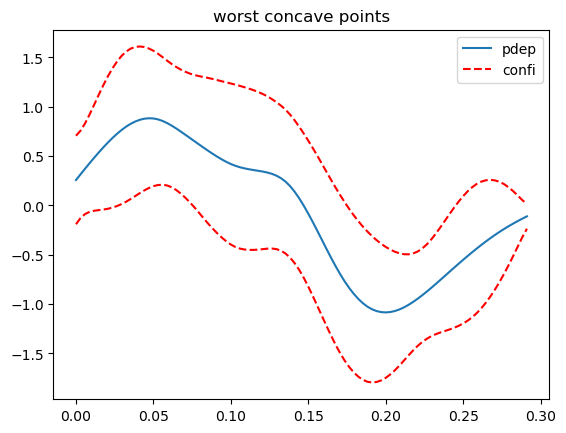

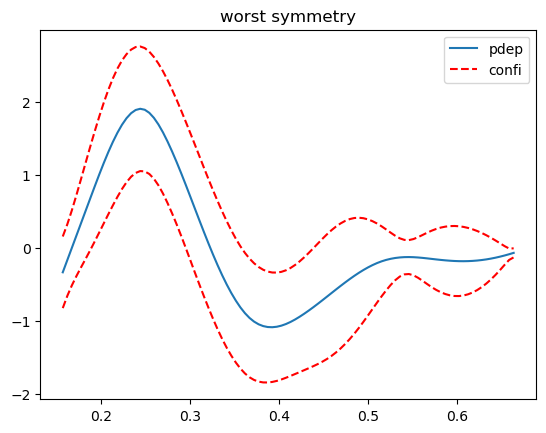

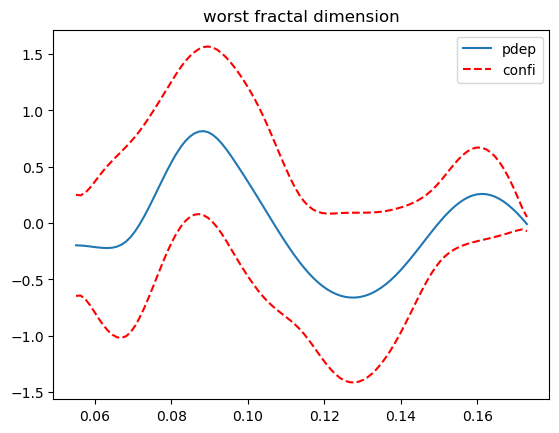

Mean Absolute Error: 0.02631578947368421
Mean Squared Error: 0.02631578947368421
R-squared: 0.8879790370127744


In [50]:
from pygam import LogisticGAM, GAM
from sklearn.metrics import mean_absolute_error

gam = LogisticGAM().fit(X_train, y_train)

# Partial dependence plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(df.columns[i])
    plt.legend(['pdep', 'confi'])
    plt.show()

# Evaluation metrics
y_pred = gam.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

In [44]:
gam.accuracy(X_test, y_test)

0.9736842105263158

### 5. Model Comparison and Analysis
* Compare the performance of SVM, advanced decision trees, and GAMs.
* Use confusion matrices and ROC curves to visualize the performance differences.
* Discuss the strengths and weaknesses of each model in the context of the dataset.

### 6. Conclusion
* Summarize the findings from the model comparisons.
* Provide insights into which model performed best and hypothesize why.
* Discuss any potential improvements or alternative approaches that could be explored.

## How to Submit
- First, a Jupyter Notebook containing all the code, comments, and analysis.
- Second report cells in the same Jupyter Notebook, summarizing your findings, including results and a discussion of the results.
- Finally convert the Jupyter Notebook to PDF.
- **Don't write your name**.
- Upload the PDF into convas.

## Evaluation Criteria (peer grading)
- Correctness of the implementation of all regression and classification models. (2 points)
- Quality of the EDA and preprocessing steps. (1 point)
- Depth of the analysis in comparing the models.(1 point)
- Clarity and organization of the submitted report and Jupyter Notebook. (1 point)

